## Introduction to Bootstrapping in Statistics

* Treditional Hypothisis Testing:
![](https://miro.medium.com/max/875/1*QpDvUNXHTSDbgwXP2kVBsA.jpeg) 
* Bootstrapping is a statistical procedure that resamples a single dataset to create many simulated samples. 
![](https://miro.medium.com/max/875/1*SgeDm_wb2QNSF0CSYVmhuw.jpeg)
* This process allows you to calculate `standard errors`, `construct confidence intervals`, and `perform hypothesis testing` for numerous types of sample statistics.
* Bootstrap methods are alternative approaches to `traditional hypothesis testing` and are notable for being easier to understand and valid for more conditions.


#### Bootstrapping and Traditional Hypothesis Testing Are Inferential Statistical Procedures:

* Both bootstrapping and traditional methods use samples to draw inferences about populations.
* To accomplish this goal, these procedures treat the single sample that a study obtains as only one of many random samples that the study could have collected.
*  From a single sample, you can calculate a variety of sample statistics, such as the mean, median, and standard deviation    `—but we’ll focus on the mean here`.


In [ ]:
# Start writing code here...

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import collections as mc


In [ ]:
Data = [22.3,27.1,24.3,25.3,26.0]
Data

[22.3, 27.1, 24.3, 25.3, 26.0]

In [ ]:
np.mean(Data) # ReSampling


25.0

In [ ]:
np.random.choice([1,2,3,4,5],size=5)

array([5, 5, 1, 5, 1])

In [ ]:
df = pd.read_csv("/work/Data/michelson_speed_of_light.csv")
df.head(2)

,Unnamed: 0,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles


In [ ]:
df.shape

(100, 15)

In [ ]:
df.columns

Index(['Unnamed: 0', 'date', 'distinctness of image', 'temperature (F)',
       'position of deflected image', 'position of slit',
       'displacement of image in divisions',
       'difference between greatest and least', 'B', 'Cor',
       'revolutions per second', 'radius (ft)', 'value of one turn of screw',
       'velocity of light in air (km/s)', 'remarks'],
      dtype='object')

In [ ]:
bs_sample = np.random.choice(df['velocity of light in air (km/s)'],size=100)
bs_sample

array([299870, 299900, 299740, 299980, 299880, 299780, 299980, 299950,
       299740, 299760, 299980, 299940, 299740, 299830, 299810, 299790,
       299870, 299850, 299980, 299810, 299880, 299870, 299880, 299860,
       299920, 299810, 299850, 299720, 299890, 299900, 299790, 299950,
       299820, 299760, 299840, 299800, 299940, 299840, 299880, 299830,
       299870, 299860, 299870, 299740, 299940, 299810, 299800, 299790,
       299880, 299800, 299880, 299830, 299840, 299810, 299880, 299960,
       299850, 299810, 299880, 299840, 299980, 299740, 299760, 299980,
       299880, 299850, 299850, 299900, 299850, 299860, 299940, 300000,
       299780, 299820, 299900, 299850, 299880, 299840, 299880, 299880,
       299880, 299820, 299840, 299880, 299900, 299950, 299960, 299930,
       299850, 299720, 299930, 299880, 299620, 299800, 299860, 299800,
       299850, 299850, 299850, 299840])

In [ ]:
np.mean(bs_sample)

299855.8

In [ ]:
np.median(bs_sample)

299850.0

In [ ]:
np.std(bs_sample)

68.82121765850994

Compuation of Bootstrap replicate

In [ ]:
speed_of_light= df['velocity of light in air (km/s)']

In [ ]:
def bootstrap_replicate(data,func):
    """
    Generate 1 D Data 

    """
    bs_sample = np.random.choice(data,len(data))

    return func(bs_sample)

In [ ]:
bootstrap_replicate(speed_of_light,np.mean)

299843.7

In [ ]:
bootstrap_replicate(speed_of_light,np.mean)

299840.2

In [ ]:
bootstrap_replicate(speed_of_light,np.mean)

299858.6

In [ ]:
# many bootstrap replicates

bs_replicates =np.empty(1000)

for i in range(1000):
    bs_replicates[i] = bootstrap_replicate(speed_of_light,np.mean)

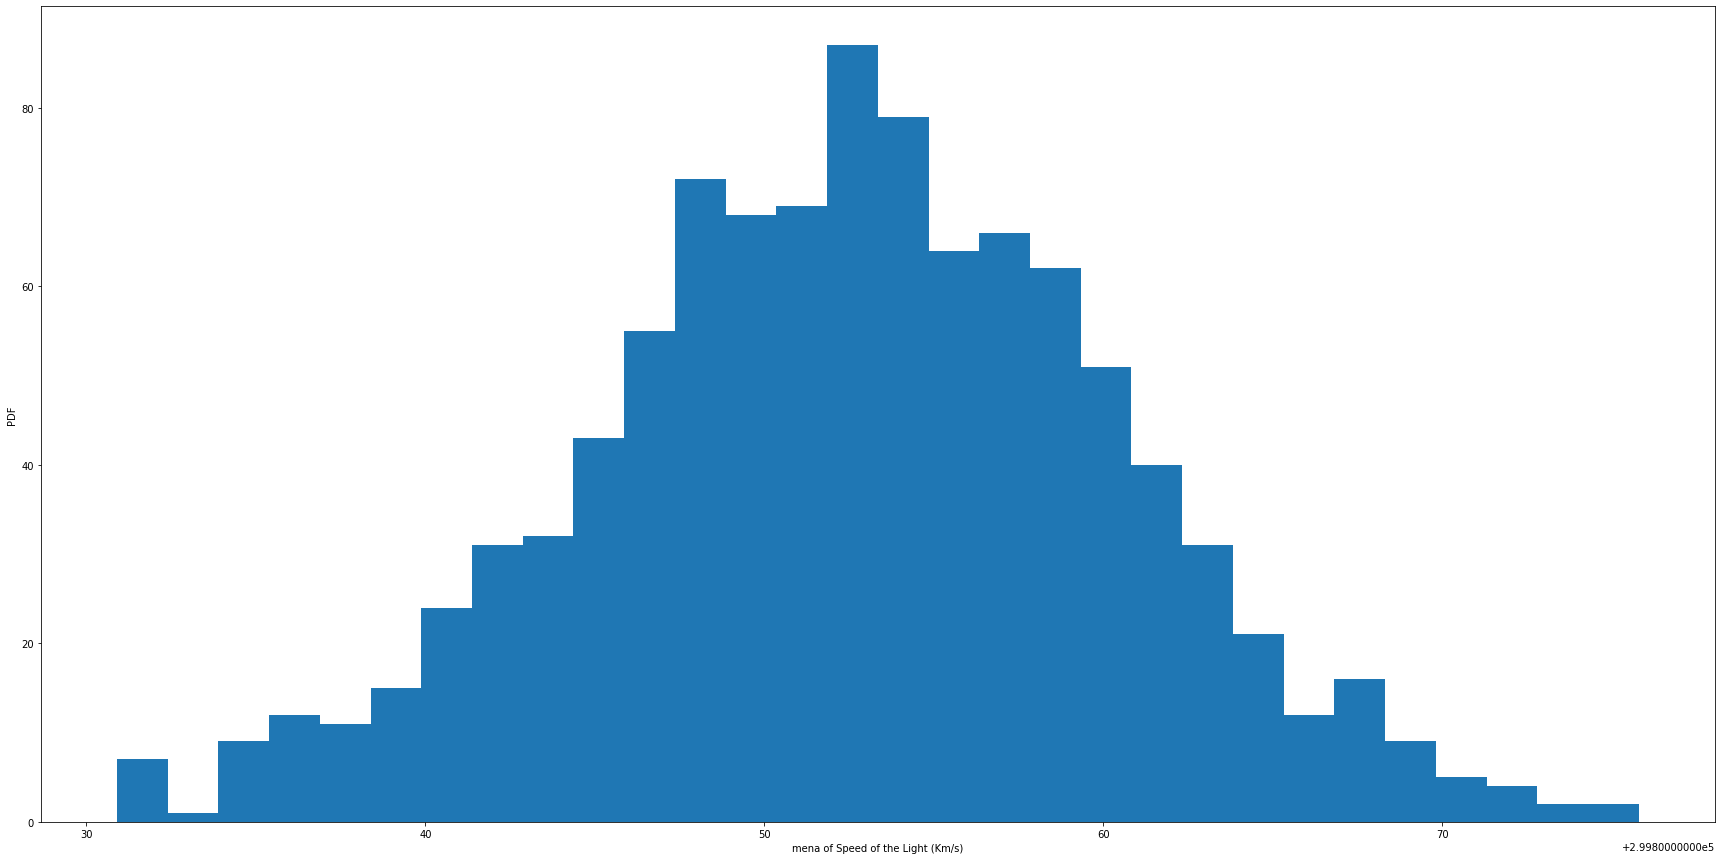

In [ ]:
plt.figure(figsize=(30,15))
_ = plt.hist(bs_replicates,bins=30)
_ = plt.xlabel("mena of Speed of the Light (Km/s)")
_ = plt.ylabel("PDF")
plt.show()

### Confidence interval of a Statistic

*   If we repeated measurements over and over again, `p%` ofthe observed values would lie within the` p%` confidence interval.



In [ ]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

In [ ]:
conf_int

array([299836.5975, 299868.1   ])

### Nonparametric inference

* Make no assumptions about the model or probability distribution underlying the data
* Statistical techniques that use data to infer unknown quantities of interest while making as few assumptions as possible.
* Typically, this involves working with large and flexible infinite-dimensional statistical models.
* The flexibility and adaptivity provided by nonparametric techniques is especially valuable in modern statistical problems of the current era of massive and complex datasets. 


In [ ]:
df = pd.read_csv("/work/Data/2008_swing_states.csv")
df.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [ ]:
swing =df.copy()

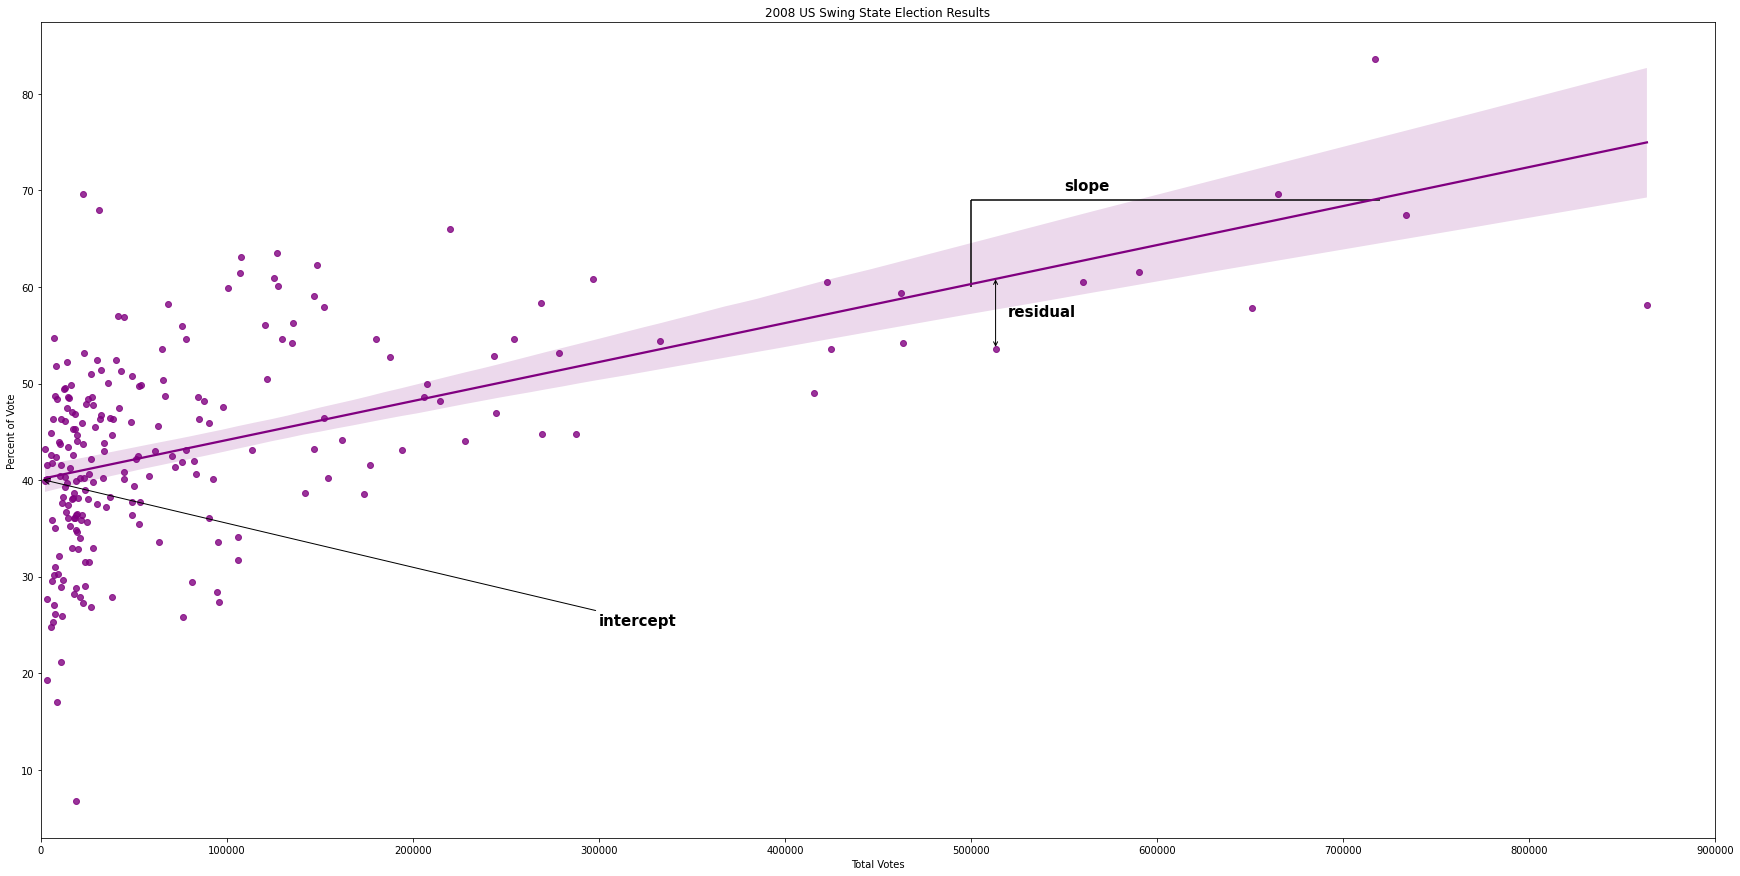

In [ ]:
plt.figure(figsize=(30,15))
g = sns.regplot(x='total_votes', y='dem_share', data=swing,color="purple")

plt.xlim(0, 900000)
plt.ylabel('Percent of Vote')
plt.xlabel('Total Votes')
plt.title('2008 US Swing State Election Results')


plt.annotate('intercept', xy=(0, 40.1), weight='bold', xytext=(300000, 25),
             fontsize=15, arrowprops=dict(arrowstyle="->", color='black'))

plt.text(550000, 70, 'slope', fontsize=15, weight='bold')
lc = mc.LineCollection([[(500000, 69), (720000, 69)], [(500000, 69), (500000, 60)]], color='black')
g.add_collection(lc)

plt.text(520000, 57, 'residual', fontsize=15, weight='bold')
plt.annotate('', xy=(513312, 53.59), xytext=(513312, 61), arrowprops=dict(arrowstyle="<->", color='black'))

plt.show()

## Pairs bootstrap for linear regression

* Resample data in pairs
* Compute slope and intercept from resampled data
* Each slope and intercept is a bootstrap replicate
* Compute confidence interval from the percentiles of bootstrap replicates


In [ ]:
inds = np.arange(len(swing.total_votes))
bs_inds = np.arange(len(swing.total_votes))
bs_total_votes = swing.total_votes[bs_inds]
bs_dem_share = swing.dem_share[bs_inds]

## Computing a pairs bootstrap replicate

In [ ]:
bs_slope, bs_intercept = np.polyfit(bs_total_votes,bs_dem_share, 1)
bs_slope, bs_intercept

(4.0370717009465596e-05, 40.11391196864175)

In [ ]:
total_votes = df.total_votes
dem_share = df.dem_share

In [ ]:
np.polyfit(total_votes, dem_share, 1) # fit of original

array([4.0370717e-05, 4.0113912e+01])

In [ ]:
def bs_df_poly_1(df: pd.DataFrame, size: int, x1: int, x2: int) -> list:
    """
    Calculates a number of bootstrap samples determined by size
    For each bs_df_sample, calculate the slope & intercept
    For each slope & intercept, calculate the line y1 & y2 for a line segment
    The returned list can be plotted with matplotlib.collections.LineCollection
    
    df: two column dataframe with x & y
    size: number of bootstrap samples
    x1: first x-intercept
    x2: second x_intercpt
    
    returns a list of line coordinates [[(x1, y1), (x2, y2)], [(x1, y1), (x2, y2)]]
    returns a list of slope intercepts
    """
    bs_df_samples = [df.sample(len(df), replace=True) for _ in range(size)]
    poly_samples = [np.polyfit(v.iloc[:, 0], v.iloc[:, 1], 1) for v in bs_df_samples]
    collections = [[(x1, v[0]*x1 + v[1]), (x2, v[0]*x2 + v[1])] for v in poly_samples]
    return poly_samples, collections

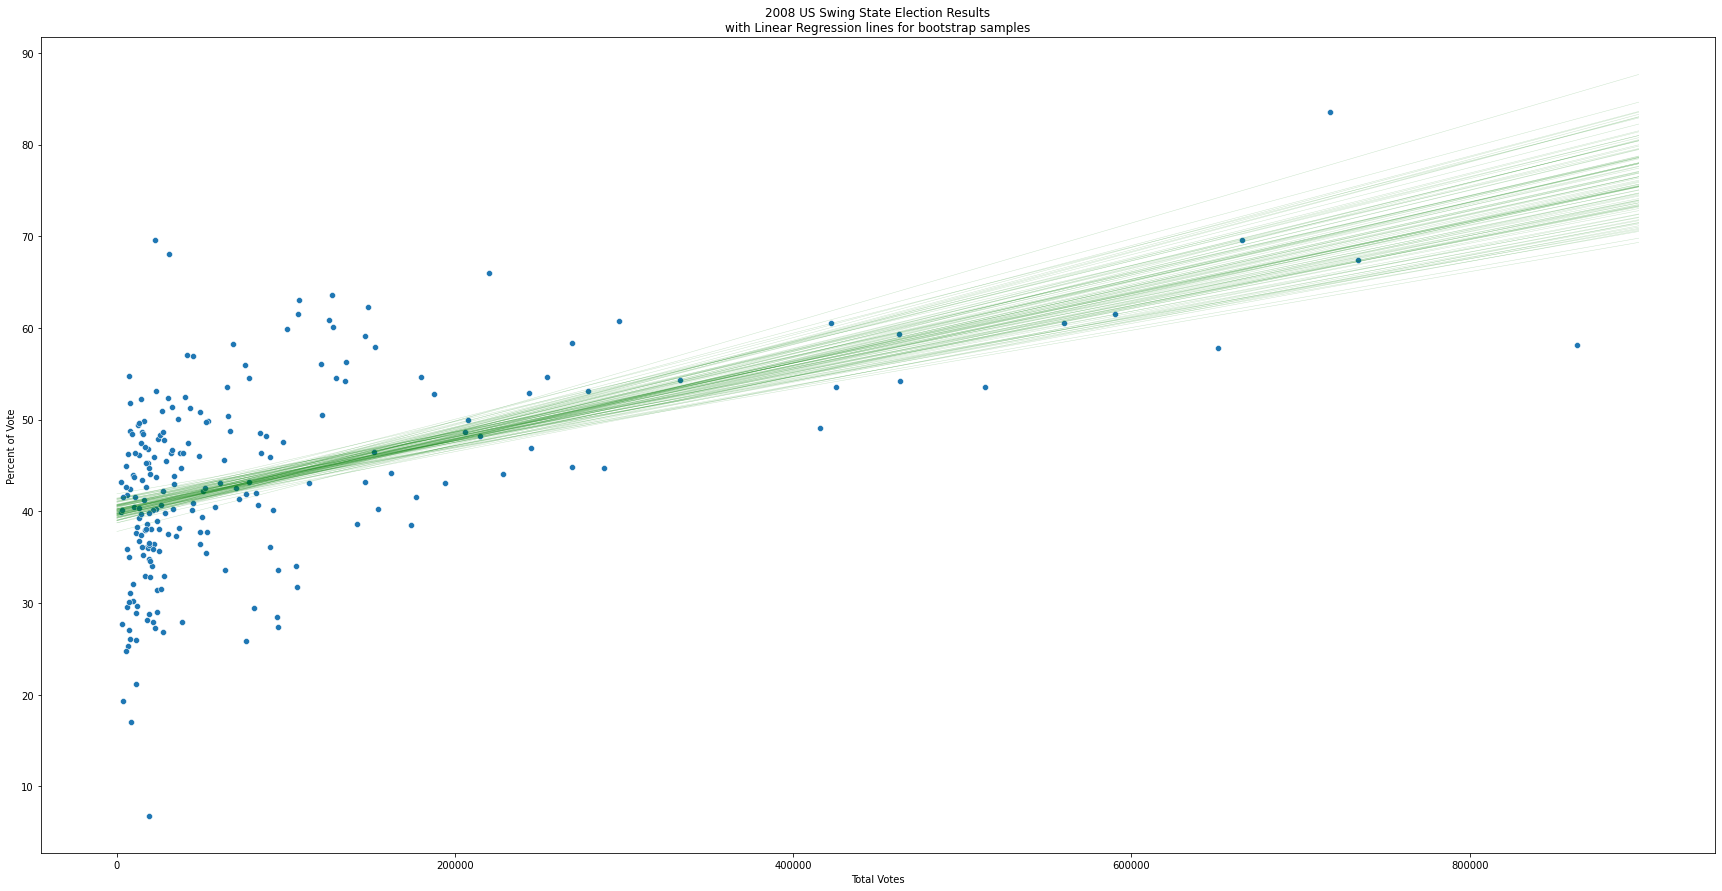

In [ ]:
plt.figure(figsize=(30,15))
g = sns.scatterplot(x=swing.total_votes, y=swing.dem_share, )

polys, lines = bs_df_poly_1(swing[['total_votes', 'dem_share']], 100, 0, 900000)

# lines can be plotted with slope and intercept
x = np.array([0, 900000])
for poly in polys:
    plt.plot(x, poly[0]*x + poly[1], linewidth=0.5, alpha=0.2, color='green')

# or lines can be plotted with a collection of lines
# lc = mc.LineCollection(lines, color='green', alpha=0.2)
# g.add_collection(lc)


plt.title('2008 US Swing State Election Results\nwith Linear Regression lines for bootstrap samples')
plt.xlabel('Total Votes')
plt.ylabel('Percent of Vote')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f5f90ba1-3290-463e-8fc6-44108f4fa21b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>